In [1]:
import sys

sys.path.insert(0, '../utils')

In [2]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms.functional as TF
from tqdm import tqdm
import torch.optim as optim
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from collections import OrderedDict
import matplotlib.pyplot as plt
from Network import *
from DataSet import *
from train_procedure import *
from Aug import *
from torchvision import transforms
import pickle

%load_ext autoreload
%autoreload 2

In [3]:
# Create the augmented dataset
create_augmented_dataset(True)

satImage_100.png: 100%|███████████████████████████████████████████████████████████| 100/100 [00:59<00:00,  1.69image/s]


In [4]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

## Experiment 5

In [5]:
dict_train5 ={"save_model": False,
            "cross_val": True,
            "skip_connection": True,
            "num_epochs": 10,
            "n_splits": 2,
            "batch_size": 10,
            "scale_channel": 1,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": 0.2,
                "use_dropout": True,
                "bias": False},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": None,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment5 = {"param": dict_train5}
experiment5["convergence_path"] = run_training(dict_train5) 


f = open("result_exp/experiment5.pkl","wb")
pickle.dump(experiment5,f)
f.close()

-------------------------- 1 fold --------------------------


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:57<00:00,  1.90it/s, loss=0.406]


Training set: epoch-1 got 66459222/86240000 with acc 77.06%, F1-score 0.52 and loss 0.5068270564079285 
Validation set: epoch-1 got 66115697/86240000 with acc 76.66% , F1-score 0.33 and validation loss 0.5178642734237722


 12%|████████▏                                                            | 13/110 [00:06<00:46,  2.10it/s, loss=0.416]


KeyboardInterrupt: 

## Experiment 6

In [ ]:
dict_train6 ={"save_model": False,
            "cross_val": True,
            "skip_connection": True,
            "num_epochs": 10,
            "n_splits": 2,
            "batch_size": 10,
            "scale_channel": 1,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": 0.5,
                "use_dropout": True,
                "bias": False},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": None,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment6 = {"param": dict_train6}
experiment6["convergence_path"] = run_training(dict_train6) 


f = open("result_exp/experiment6.pkl","wb")
pickle.dump(experiment6,f)
f.close()

In [8]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)



f = open(f"result_exp/experiment{2}bis.pkl","rb")
previous_exp = CPU_Unpickler(f).load()
f.close()

prev_exp_last_val_F1 = 0.5*(np.array(previous_exp["convergence_path"]["Kfold 0"]["val_F1"]) + np.array(previous_exp["convergence_path"]["Kfold 1"]["val_F1"]))
exp5_last_val_F1 = 0.5*(np.array(exp5["convergence_path"]["Kfold 0"]["val_F1"]) + np.array(exp5["convergence_path"]["Kfold 1"]["val_F1"]))
exp6_last_val_F1 = 0.5*(np.array(exp6["convergence_path"]["Kfold 0"]["val_F1"]) + np.array(exp6["convergence_path"]["Kfold 1"]["val_F1"]))

best_val_F1 = 0

if prev_exp_last_val_F1 > max(exp5_last_val_F1,exp6_last_val_F1):
    use_drop = False
    best_val_F1 = prev_exp_last_val_F1
else:
    use_drop = True
    if exp5_last_val_F1>exp6_last_val_F1:
        p = 0.2
        best_val_F1 =  exp5_last_val_F1
    else:
        p = 0.5
        best_val_F1 =  exp6_last_val_F1

NameError: name 'exp5' is not defined

## Experiment 7

In [ ]:
dict_train7 ={"save_model": False,
            "cross_val": True,
            "skip_connection": True,
            "num_epochs": 10,
            "n_splits": 2,
            "batch_size": 1,
            "scale_channel": 1,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": p,
                "use_dropout": use_drop,
                "bias": False},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": None,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment7 = {"param": dict_train7}
experiment7["convergence_path"] = run_training(dict_train7) 


f = open("result_exp/experiment7.pkl","wb")
pickle.dump(experiment7,f)
f.close()

## Experiment 8

In [ ]:
dict_train8 ={"save_model": False,
            "cross_val": True,
            "skip_connection": True,
            "num_epochs": 10,
            "n_splits": 2,
            "batch_size": 20,
            "scale_channel": 1,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": p,
                "use_dropout": use_drop,
                "bias": False},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": None,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment8 = {"param": dict_train8}
experiment8["convergence_path"] = run_training(dict_train8) 


f = open("result_exp/experiment8.pkl","wb")
pickle.dump(experiment8,f)
f.close()

In [ ]:
exp7_last_val_F1 = 0.5*(np.array(exp7["convergence_path"]["Kfold 0"]["val_F1"]) + np.array(exp7["convergence_path"]["Kfold 1"]["val_F1"]))
exp8_last_val_F1 = 0.5*(np.array(exp8["convergence_path"]["Kfold 0"]["val_F1"]) + np.array(exp8["convergence_path"]["Kfold 1"]["val_F1"]))


if best_val_F1 > max(exp7_last_val_F1,exp6_last_val_F1):
        new_batch_size = 10
    best_val_F1 = best_val_F1
elif exp7_last_val_F1>max(best_val_F1,exp8_last_val_F1):
        new_batch_size = 1
        best_val_F1 =  exp7_last_val_F1
elif exp8_last_val_F1>max(best_val_F1,exp7_last_val_F1):
        new_batch_size = 20
        best_val_F1 =  exp8_last_val_F1

## Experiment 9

In [15]:
dict_train9 ={"save_model": False,
            "cross_val": True,
            "skip_connection": True,
            "num_epochs": 10,
            "n_splits": 2,
            "batch_size": new_batch_size,
            "scale_channel": 1,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": p,
                "use_dropout": use_drop,
                "bias": False},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": 1e-04,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment9 = {"param": dict_train9}
experiment9["convergence_path"] = run_training(dict_train9) 


f = open("result_exp/experiment9.pkl","wb")
pickle.dump(experiment9,f)
f.close()

-------------------------- 1 fold --------------------------


  0%|                                                  | 0/1100 [00:00<?, ?it/s]

(280, 280)


  0%|                              | 1/1100 [00:01<19:47,  1.08s/it, loss=0.901]

(280, 280)


  0%|                               | 2/1100 [00:01<17:51,  1.03it/s, loss=1.01]

(280, 280)


  0%|                              | 3/1100 [00:02<15:42,  1.16it/s, loss=0.781]

(280, 280)


  0%|                              | 4/1100 [00:03<14:43,  1.24it/s, loss=0.826]

(280, 280)


  0%|▏                             | 5/1100 [00:04<14:09,  1.29it/s, loss=0.769]

(280, 280)


  1%|▏                             | 6/1100 [00:04<13:48,  1.32it/s, loss=0.853]

(280, 280)


  1%|▏                             | 7/1100 [00:05<14:08,  1.29it/s, loss=0.777]

(280, 280)


  1%|▏                             | 8/1100 [00:06<14:35,  1.25it/s, loss=0.768]

(280, 280)


  1%|▎                              | 9/1100 [00:07<14:11,  1.28it/s, loss=0.75]

(280, 280)


  1%|▎                            | 10/1100 [00:08<13:54,  1.31it/s, loss=0.705]

(280, 280)


  1%|▎                            | 11/1100 [00:08<13:37,  1.33it/s, loss=0.912]

(280, 280)


  1%|▎                            | 12/1100 [00:09<14:04,  1.29it/s, loss=0.766]

(280, 280)


  1%|▎                            | 13/1100 [00:10<14:51,  1.22it/s, loss=0.914]

(280, 280)


  1%|▎                            | 14/1100 [00:11<14:22,  1.26it/s, loss=0.729]

(280, 280)


  1%|▍                            | 15/1100 [00:11<14:07,  1.28it/s, loss=0.754]

(280, 280)


  1%|▍                            | 16/1100 [00:12<13:50,  1.31it/s, loss=0.728]

(280, 280)


  2%|▍                            | 17/1100 [00:13<13:52,  1.30it/s, loss=0.736]

(280, 280)


  2%|▍                            | 18/1100 [00:14<13:51,  1.30it/s, loss=0.743]

(280, 280)


  2%|▌                            | 19/1100 [00:15<13:50,  1.30it/s, loss=0.757]

(280, 280)


  2%|▌                            | 20/1100 [00:15<13:48,  1.30it/s, loss=0.703]

(280, 280)


  2%|▌                            | 21/1100 [00:16<14:42,  1.22it/s, loss=0.702]

(280, 280)


  2%|▌                            | 22/1100 [00:17<14:31,  1.24it/s, loss=0.739]

(280, 280)


  2%|▌                            | 23/1100 [00:18<14:11,  1.26it/s, loss=0.715]

(280, 280)


  2%|▋                             | 24/1100 [00:18<13:58,  1.28it/s, loss=0.69]

(280, 280)


  2%|▋                            | 25/1100 [00:19<13:44,  1.30it/s, loss=0.674]

(280, 280)


  2%|▋                            | 26/1100 [00:20<13:34,  1.32it/s, loss=0.685]

(280, 280)


  2%|▋                            | 27/1100 [00:21<13:25,  1.33it/s, loss=0.717]

(280, 280)


  3%|▋                            | 28/1100 [00:21<13:24,  1.33it/s, loss=0.735]

(280, 280)


  3%|▊                            | 29/1100 [00:22<13:23,  1.33it/s, loss=0.645]

(280, 280)


  3%|▊                            | 30/1100 [00:23<13:32,  1.32it/s, loss=0.701]

(280, 280)


  3%|▊                            | 31/1100 [00:24<14:25,  1.24it/s, loss=0.689]

(280, 280)


  3%|▊                            | 32/1100 [00:25<15:06,  1.18it/s, loss=0.714]

(280, 280)


  3%|▊                            | 33/1100 [00:26<14:48,  1.20it/s, loss=0.616]

(280, 280)


  3%|▉                            | 34/1100 [00:26<14:30,  1.22it/s, loss=0.726]

(280, 280)


  3%|▉                            | 35/1100 [00:27<14:10,  1.25it/s, loss=0.623]

(280, 280)


  3%|▉                            | 36/1100 [00:28<13:52,  1.28it/s, loss=0.695]

(280, 280)


  3%|▉                            | 37/1100 [00:29<13:39,  1.30it/s, loss=0.684]

(280, 280)


  3%|█                            | 38/1100 [00:29<13:27,  1.32it/s, loss=0.694]

(280, 280)


  4%|█                            | 39/1100 [00:30<13:21,  1.32it/s, loss=0.682]

(280, 280)


  4%|█                            | 40/1100 [00:31<13:25,  1.32it/s, loss=0.637]

(280, 280)


  4%|█                            | 41/1100 [00:32<13:22,  1.32it/s, loss=0.641]

(280, 280)


  4%|█                            | 42/1100 [00:32<13:17,  1.33it/s, loss=0.644]

(280, 280)


  4%|█▏                            | 43/1100 [00:33<13:13,  1.33it/s, loss=0.66]

(280, 280)


  4%|█▏                           | 44/1100 [00:34<13:38,  1.29it/s, loss=0.627]

(280, 280)


  4%|█▏                           | 45/1100 [00:35<13:38,  1.29it/s, loss=0.644]

(280, 280)


  4%|█▏                           | 46/1100 [00:36<15:04,  1.17it/s, loss=0.588]

(280, 280)


  4%|█▏                           | 47/1100 [00:37<14:57,  1.17it/s, loss=0.593]

(280, 280)


  4%|█▎                           | 48/1100 [00:37<14:39,  1.20it/s, loss=0.645]

(280, 280)


  4%|█▎                           | 49/1100 [00:38<14:26,  1.21it/s, loss=0.657]

(280, 280)


  5%|█▎                            | 50/1100 [00:39<15:32,  1.13it/s, loss=0.68]

(280, 280)


  5%|█▎                           | 51/1100 [00:40<15:10,  1.15it/s, loss=0.682]

(280, 280)


  5%|█▎                           | 52/1100 [00:41<14:41,  1.19it/s, loss=0.646]

(280, 280)


  5%|█▍                           | 53/1100 [00:42<14:15,  1.22it/s, loss=0.617]

(280, 280)


  5%|█▍                           | 54/1100 [00:42<13:57,  1.25it/s, loss=0.664]

(280, 280)


  5%|█▍                           | 55/1100 [00:43<13:50,  1.26it/s, loss=0.616]

(280, 280)


  5%|█▌                             | 56/1100 [00:44<13:38,  1.28it/s, loss=0.6]

(280, 280)


  5%|█▌                           | 57/1100 [00:45<13:38,  1.27it/s, loss=0.582]

(280, 280)


  5%|█▌                           | 58/1100 [00:46<13:32,  1.28it/s, loss=0.694]

(280, 280)


  5%|█▌                           | 59/1100 [00:46<13:28,  1.29it/s, loss=0.623]

(280, 280)


  5%|█▌                           | 60/1100 [00:47<13:21,  1.30it/s, loss=0.572]

(280, 280)


  6%|█▌                           | 61/1100 [00:48<13:55,  1.24it/s, loss=0.598]

(280, 280)


  6%|█▋                           | 62/1100 [00:49<14:36,  1.18it/s, loss=0.607]

(280, 280)


  6%|█▋                           | 63/1100 [00:50<15:11,  1.14it/s, loss=0.636]

(280, 280)


  6%|█▋                           | 64/1100 [00:51<15:04,  1.15it/s, loss=0.581]

(280, 280)


  6%|█▋                           | 65/1100 [00:51<14:34,  1.18it/s, loss=0.581]

(280, 280)


  6%|█▋                           | 66/1100 [00:52<14:43,  1.17it/s, loss=0.561]

(280, 280)


  6%|█▊                            | 67/1100 [00:53<15:06,  1.14it/s, loss=0.61]

(280, 280)


  6%|█▊                            | 68/1100 [00:54<14:58,  1.15it/s, loss=0.66]

(280, 280)


  6%|█▊                           | 69/1100 [00:55<14:31,  1.18it/s, loss=0.551]

(280, 280)


  6%|█▊                           | 70/1100 [00:56<14:05,  1.22it/s, loss=0.573]

(280, 280)


  6%|█▊                           | 71/1100 [00:57<14:22,  1.19it/s, loss=0.561]

(280, 280)


  7%|█▉                           | 72/1100 [00:57<14:44,  1.16it/s, loss=0.538]

(280, 280)


  7%|█▉                           | 73/1100 [00:58<14:54,  1.15it/s, loss=0.649]

(280, 280)


  7%|█▉                           | 74/1100 [00:59<14:44,  1.16it/s, loss=0.634]

(280, 280)


  7%|█▉                           | 75/1100 [01:00<14:18,  1.19it/s, loss=0.562]

(280, 280)


  7%|██                           | 76/1100 [01:01<13:46,  1.24it/s, loss=0.552]

(280, 280)


  7%|██                           | 77/1100 [01:01<13:23,  1.27it/s, loss=0.636]

(280, 280)


  7%|██▏                           | 78/1100 [01:02<13:29,  1.26it/s, loss=0.55]

(280, 280)


  7%|██                           | 79/1100 [01:03<13:18,  1.28it/s, loss=0.577]

(280, 280)


  7%|██                           | 80/1100 [01:04<13:10,  1.29it/s, loss=0.576]

(280, 280)


  7%|██▏                           | 81/1100 [01:05<14:04,  1.21it/s, loss=0.59]

(280, 280)


  7%|██▏                           | 81/1100 [01:06<13:51,  1.23it/s, loss=0.59]


KeyboardInterrupt: 

## Experiment 10

In [ ]:
dict_train10 ={"save_model": False,
            "cross_val": True,
            "skip_connection": True,
            "num_epochs": 10,
            "n_splits": 2,
            "batch_size": new_batch_size,
            "scale_channel": 1,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": p,
                "use_dropout": use_drop,
                "bias": False},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": 1e-02,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment10 = {"param": dict_train10}
experiment10["convergence_path"] = run_training(dict_train10) 


f = open("result_exp/experiment10.pkl","wb")
pickle.dump(experiment10,f)
f.close()

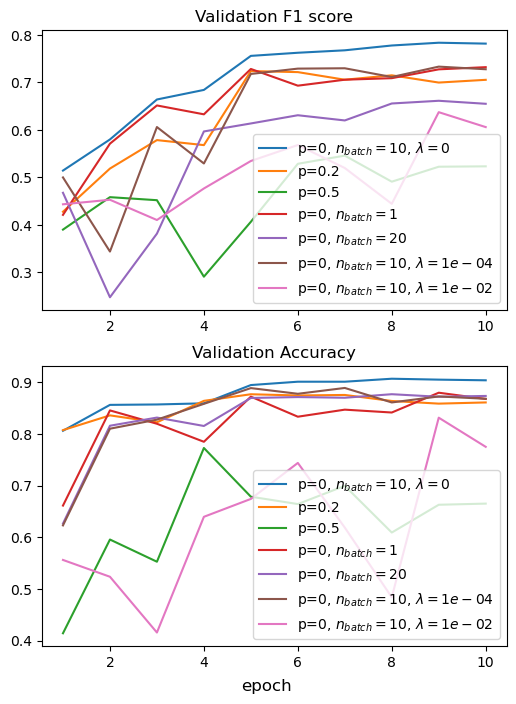

In [28]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

exp = {}

for i in range(5,11):
    f = open(f"result_exp/experiment{i}.pkl","rb")
    exp[f"exp{i}"] = CPU_Unpickler(f).load()
    f.close()

f = open(f"result_exp/experiment2bis.pkl","rb")
exp_4_ = CPU_Unpickler(f).load()
f.close()


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8))

y = 0.5*(np.array(exp_4_["convergence_path"]["Kfold 0"]["val_F1"]) + np.array(exp_4_["convergence_path"]["Kfold 1"]["val_F1"]))
ax1.plot(np.arange(1,len(y)+1),y,label=r"p=0, $n_{batch} = 10$, $\lambda=0$")
y = 0.5*(np.array(exp_4_["convergence_path"]["Kfold 0"]["val_acc"]) + np.array(exp_4_["convergence_path"]["Kfold 1"]["val_acc"]))
ax2.plot(np.arange(1,len(y)+1),y,'-',label=r"p=0, $n_{batch} = 10$, $\lambda=0$")
    
label = ["p=0.2",'p=0.5',r'p=0, $n_{batch}=1$',r'p=0, $n_{batch}=20$',r'p=0, $n_{batch} = 10$, $\lambda = 1e-04$',r'p=0, $n_{batch} = 10$, $\lambda = 1e-02$']
for i in range(5,5+len(exp)):
    y = 0.5*(np.array(exp[f"exp{i}"]["convergence_path"]["Kfold 0"]["val_F1"]) + np.array(exp[f"exp{i}"]["convergence_path"]["Kfold 1"]["val_F1"]))
    ax1.plot(np.arange(1,len(y)+1),y,label=label[i-5])
    y = 0.5*(np.array(exp[f"exp{i}"]["convergence_path"]["Kfold 0"]["val_acc"]) + np.array(exp[f"exp{i}"]["convergence_path"]["Kfold 1"]["val_acc"]))
    ax2.plot(np.arange(1,len(y)+1),y,'-',label=label[i-5])
ax2.legend()
ax1.legend()
ax1.set_title('Validation F1 score')
ax2.set_title('Validation Accuracy')
fig.supxlabel('epoch',y=0.05)
plt.savefig('Figure/val_acc_3.pdf', dpi=300, bbox_inches='tight')
plt.show()